# Kmeans Clustering.

In [1]:
 # https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-6-clustering/

 ## Important Links:

1. [Sklearn Clustering Notes](https://scikit-learn.org/stable/modules/clustering.html)


2. [Kmeans clustering sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

***
i) Parallel K-means Clustering:
    
* [ i) Parallel K-means Clustering. Sklearn demo 1](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)
* [ ii) Parallel K-means Clustering Kmeans using different cluster quality metrics](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py)
    
    
ii) MiniBatch Kmeans
    
* [i) comparision between kmeans & Mini batch kmeans](https://scikitlearn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py)
* [ii) Clustering text documents using k-means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)
* [iii) Online learning of a dictionary of parts of faces](https://scikit-learn.org/stable/auto_examples/cluster/plot_dict_face_patches.html#sphx-glr-auto-examples-cluster-plot-dict-face-patches-py)

     
***

3. [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

# Step 1: Import libraries required.

In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Load dataset

In [3]:
dataset = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')

In [4]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# Column rename.

dataset= dataset.rename(columns={'ID#':'ID', 'Award?':'Award'})

Data feature information availabele in https://github.com/ShrikantUppin/Clustering/tree/main/1.%20Data%20preprocessing%20%26%20PCA%20output

# Step 3: Data preprocessing 

In [6]:
# not going to falloe EDA step here since it is already done in link1.(Above cell)
# as we know ID & award will not make much contribution during clutering. we will drop both columns.

dataset1 =  dataset.drop(['ID','Award'], axis=1)
dataset1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


 ## I am using two transformation..since to ckeck how cluster numbers varry with diff transformation.

 ### standardization

In [7]:

from sklearn.preprocessing import StandardScaler

std_df = StandardScaler().fit_transform(dataset1)      # this will used for kmeans
std_df.shape

(3999, 10)

 ### MinMaxScalar

In [8]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(dataset1)
minmax_df.shape

(3999, 10)

# Step 4: PCA

 ### 4.1 Running PCA of standardized data.

In [9]:
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [10]:
# eigenvalues..

print(pca_std.singular_values_)

[110.44189995  83.11377294  64.82616793  63.48944763  61.96605949
  60.17942085  51.82140955  38.09870033]


In [11]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[30.50115845 17.27406665 10.5087073  10.07979485  9.60188179  9.05617078
  6.71532505  3.62968484]


In [12]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([30.50115845, 47.7752251 , 58.28393239, 68.36372724, 77.96560903,
       87.02177981, 93.73710486, 97.3667897 ])

 Conclusion:
 
 * by applying PCA on standardized data with 95% variance it gives 8 PCA components.

 ### 4.2 Running PCA of MinMaxscalar data.

In [13]:
# applying PCA on minmax_df

from sklearn.decomposition import PCA

pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)

In [14]:
# eigenvalues..

print(pca_minmax.singular_values_)

[23.30644253 14.98078096  6.73641543  4.71018421  4.35528647]


In [15]:
# variance containing in each formed PCA

print(pca_minmax.explained_variance_ratio_*100)

[60.47067269 24.98398618  5.05185116  2.46983879  2.11167109]


 Conclusion:
 
 * By applying PCA on MinMaxscalr transformation data gives 5 PCA components.

# Step 5: KMeans Clustering.
***

## 5.1.1 How many numbers of cluster. Also deciding which transformation data we will use to build model.

##### First Stage: Taking stadardization transformation data & PCA applied on it.
***

 #### Method1:

model1


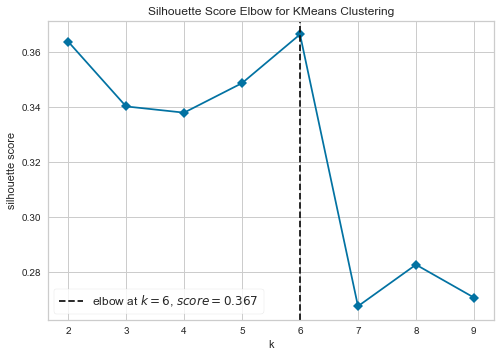

model2


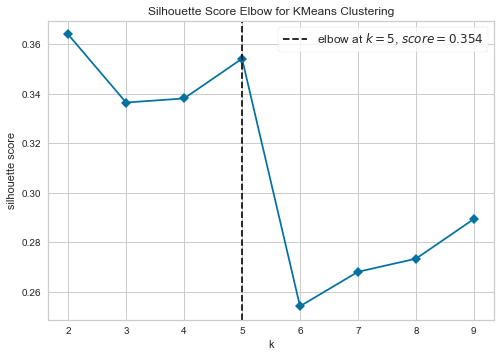

In [16]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model1 = KMeans(random_state=0,n_jobs=-1)
model2 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='silhouette', timings=False)
visualizer2 = KElbowVisualizer(model2, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model1')
visualizer1.fit(pca_std_df)    
visualizer1.poof()
plt.show()

print('model2')
visualizer2.fit(pca_std_df)    
visualizer2.poof()
plt.show()

 #### Conclusion:
 
* Since we don't know true labels so we have used silhoutte score method to determine good k numbers based on score.


* Also it is proved that even if we feed data either PCA or scaled data outliers will always affect in kmeans clustering. Also when random_state value, max_iter number n_int chnaged the clustering numbers changed.


* So before using KMeans clustering it is better to have discussion or decision on outliers.

 #### Method 2

In [17]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.36397881678961763
For n_clusters = 3 The average silhouette_score is : 0.3403814231068285
For n_clusters = 4 The average silhouette_score is : 0.3381189559647632
For n_clusters = 5 The average silhouette_score is : 0.3488588702945302
For n_clusters = 6 The average silhouette_score is : 0.3665724589453309
For n_clusters = 7 The average silhouette_score is : 0.2677310100582736
For n_clusters = 8 The average silhouette_score is : 0.2828423666585155
For n_clusters = 9 The average silhouette_score is : 0.27087656757092415


 #### Conclusion:
    
 * By taking standardize data pca it gives number of cluster =6 with silhoette score = 0.36

##### Second Stage: Taking MinMaxScalar transformation data & PCA applied on it.

model3


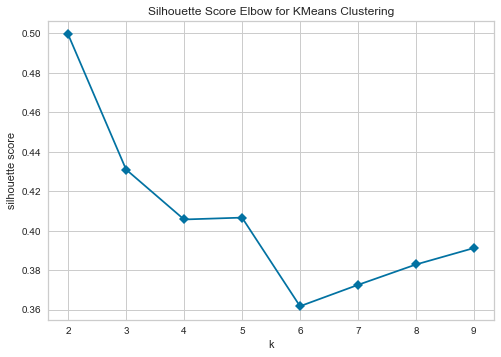

model4


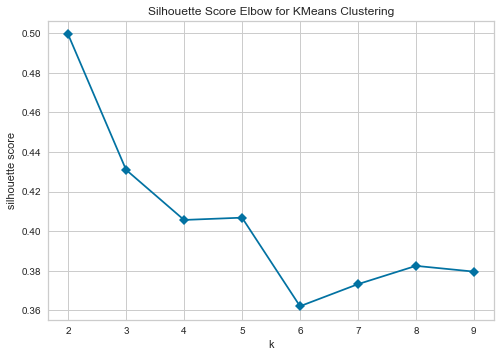

In [18]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method

#Import the KElbowVisualizer method
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model3 = KMeans(random_state=0,n_jobs=-1)
model4 = KMeans(random_state=10, n_jobs=-1, max_iter=500, n_init=20)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer3 = KElbowVisualizer(model3, k=(2,10), metric='silhouette', timings=False)
visualizer4 = KElbowVisualizer(model4, k=(2,10), metric='silhouette', timings=False)
# Fit the data and visualize
print('model3')
visualizer3.fit(pca_minmax_df)    
visualizer3.poof()
plt.show()

print('model4')
visualizer4.fit(pca_minmax_df)    
visualizer4.poof()
plt.show()

 #### method2:

In [19]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels2 = clusterer1.fit_predict(pca_minmax_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.14762674461920125
For n_clusters = 3 The average silhouette_score is : 0.14762674461920125
For n_clusters = 4 The average silhouette_score is : 0.14762674461920125
For n_clusters = 5 The average silhouette_score is : 0.14762674461920125
For n_clusters = 6 The average silhouette_score is : 0.14762674461920125
For n_clusters = 7 The average silhouette_score is : 0.14762674461920125
For n_clusters = 8 The average silhouette_score is : 0.14762674461920125
For n_clusters = 9 The average silhouette_score is : 0.14762674461920125


#### Conclusion:
    
 * By taking pca_minmax_df data it gives minimum number of cluster =4 with silhoette score = 0.1476
 
 
 * If we check silhouette score with standardize data pca kmeans model 0.36>0.14 So we will PCA which is applied on normalizatied data. Since the score is very less. Best score alwways close to +1.

## 5.1.2 Run K-Means:

In [20]:
# we have found good number of cluster = 6
# model building using cluster numbers = 6

model1 = KMeans(n_clusters=6, random_state=0,n_jobs=-1)
y_predict1 = model1.fit_predict(pca_std_df)

In [21]:
# these are nothing but cluster labels...

y_predict1

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
# y_predict & cluster labels both are same use any one of them to avoid further confusion.

model1.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
# cluster centres associated with each lables

model1.cluster_centers_

array([[ 1.40946275e+00, -1.01129248e+00, -8.23843161e-02,
         9.86412993e-02, -2.56008051e-01, -2.43931657e-01,
        -7.40640231e-02, -1.43349830e-02],
       [-1.03618281e+00,  2.58724341e-01, -1.45470873e-02,
        -8.64531845e-02, -5.37230371e-02,  1.37714954e-01,
         5.73121640e-02, -2.18692957e-03],
       [ 4.25165028e+00,  4.10908160e+00,  1.48662899e-01,
        -2.15415252e-01, -6.18448771e-01,  4.99526780e-01,
        -5.24799096e-02,  1.44221559e-01],
       [ 1.00930830e+00,  1.64553073e+00, -3.00204858e+00,
        -1.50525621e+00,  4.87613963e+00, -2.83327858e+00,
        -8.15524057e-01, -2.42368955e-02],
       [ 4.76675141e-02,  1.06794180e+00,  3.90187367e+00,
         7.28531492e+00,  3.55053601e+00, -6.82561937e-01,
         2.01781543e-01,  2.39276034e-01],
       [ 4.35245436e+00, -3.63296061e+00,  8.67825558e+00,
        -7.27101378e+00,  7.22379804e+00,  6.82996771e+00,
         1.09780252e-01, -3.57742407e-01]])

In [24]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model1.inertia_

16718.396765236546

In [25]:
model1.score(pca_std_df) 

# it is opposite value of sum of squared value..avoid to use it. It is bit confusing

-16718.396765236546

In [26]:
# this will give what hyper parameter is used in model.


model1.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 6,
 'n_init': 10,
 'n_jobs': -1,
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

## 5.1.3 visualizing silhoutte score..for different cluster

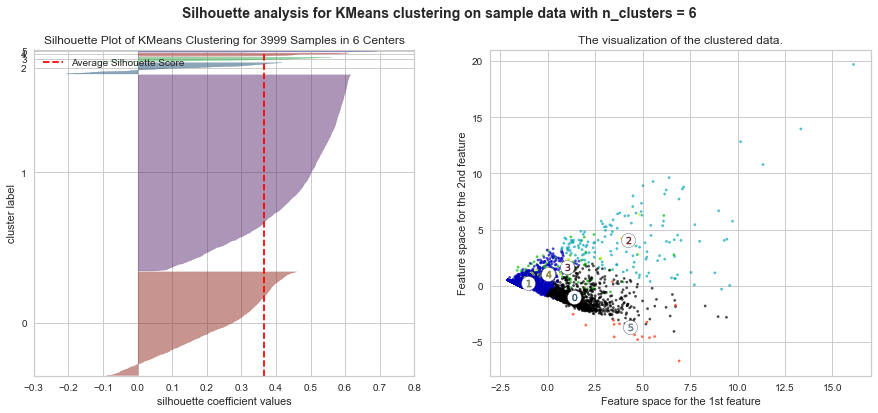

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model1,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(pca_std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model1.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(pca_std_df[:, 0], pca_std_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model1.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0], centers1[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()


## 5.1.4 Putting Cluster lables into original dataset And analysis of the same.

In [28]:
# Creating dataframe of cluster lables..

model1_cluster = pd.DataFrame(model1.labels_.copy(), columns=['Model1_Clustering'])

In [29]:
# Concating model1_Cluster df with main dataset copy

model1_df = pd.concat([dataset.copy(), model1_cluster], axis=1)
model1_df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Model1_Clustering
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


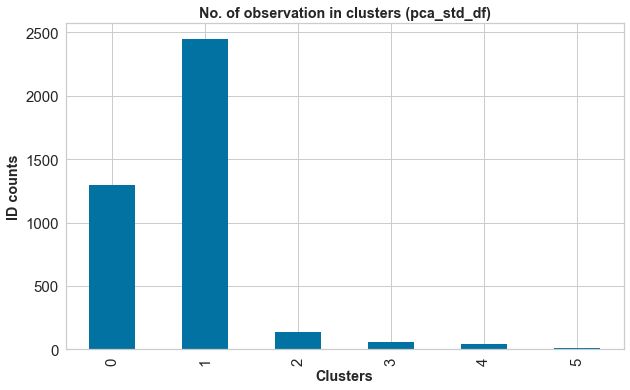

In [30]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
model1_df.groupby(['Model1_Clustering']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('No. of observation in clusters (pca_std_df)',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

# Step 6: Hierarchical Clustering Algorithm

<p align='justify'> The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first: </p>

[Hierarchical Clustering Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

## 6.1.1 How many numbers of cluster. Also deciding which transformation data we will use to build model.

 Qiuck Notes: 

linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* ward minimizes the variance of the clusters being merged.

* average uses the average of the distances of each observation of the two sets.

* complete or maximum linkage uses the maximum distances between all observations of the two sets.

* single uses the minimum of the distances between all observations of the two sets.

##### First Stage: Taking stadardization transformation data & PCA applied on it.
***

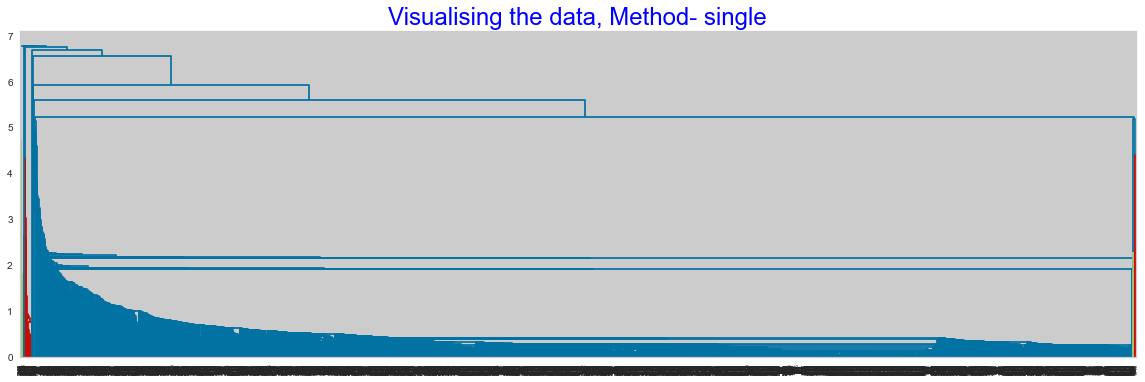

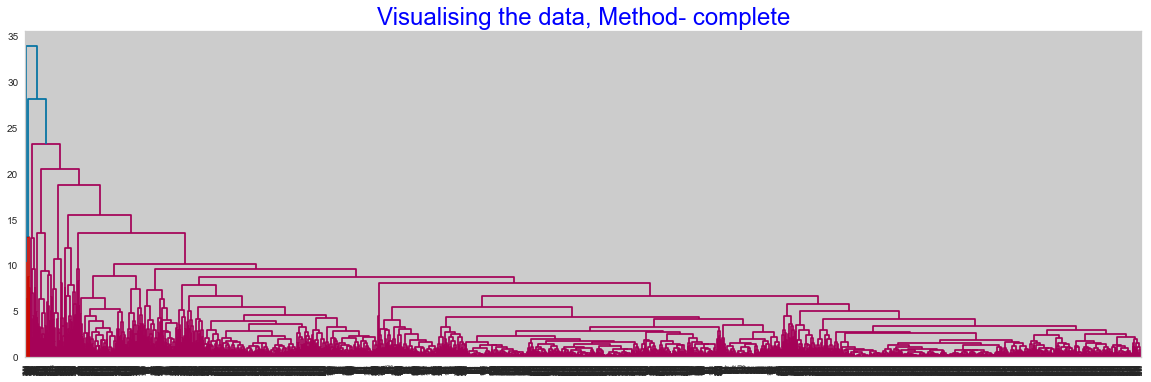

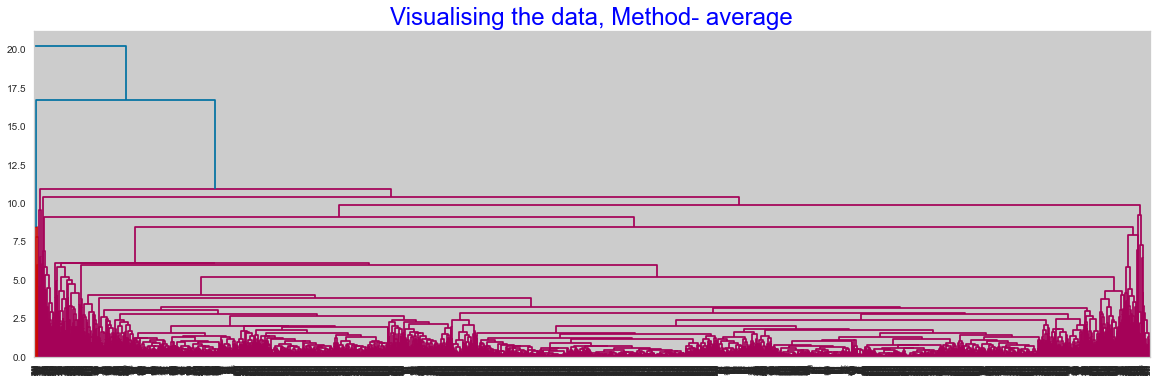

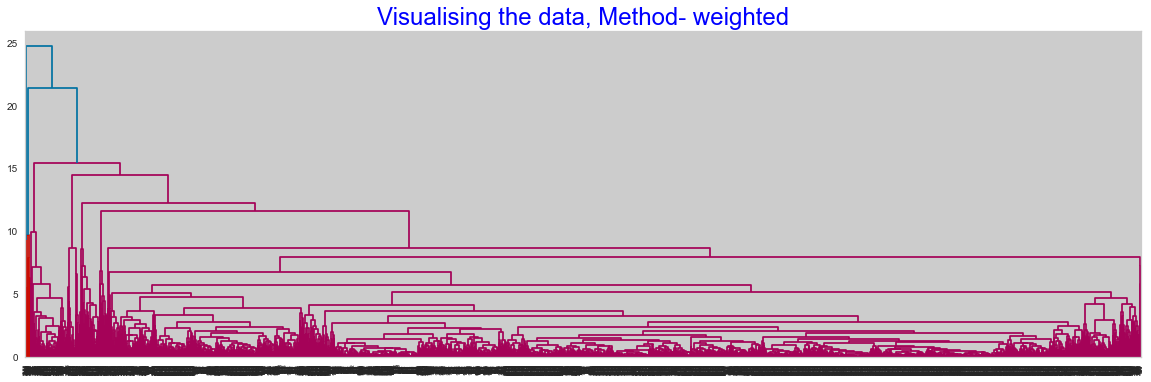

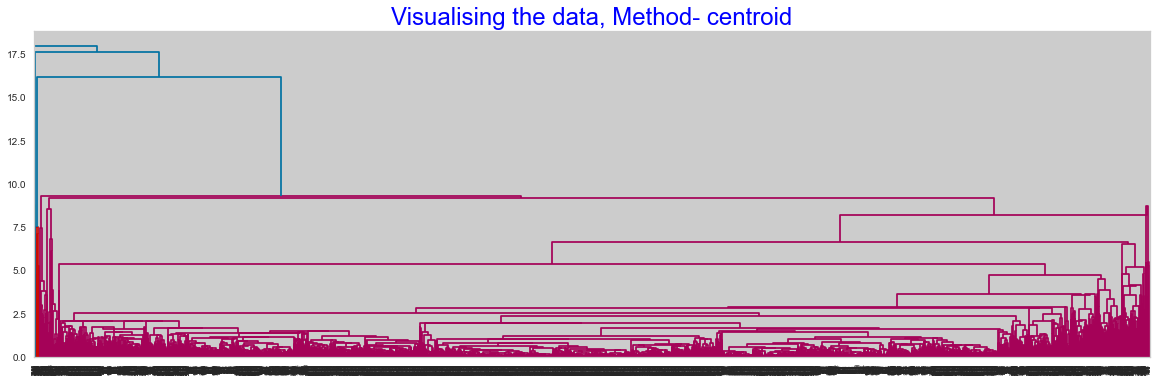

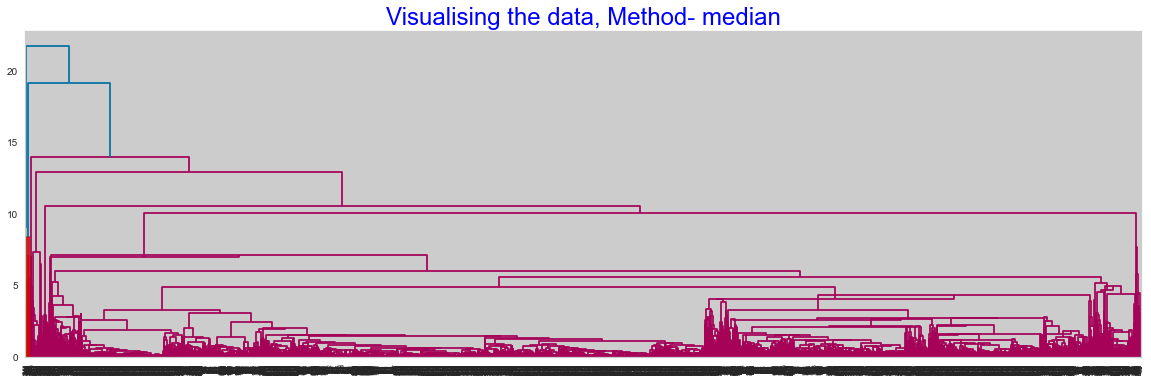

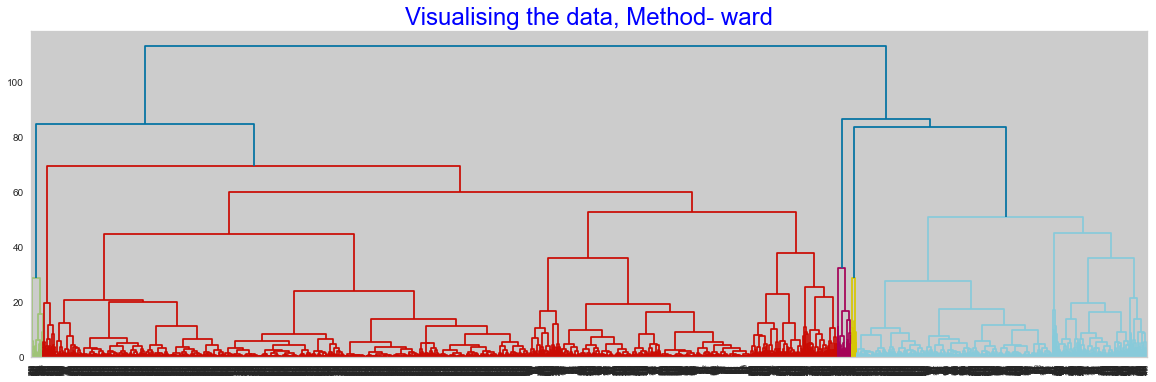

In [34]:
# Applying Dendrogram on PCA data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = shc.dendrogram(shc.linkage(pca_std_df, method = methods,optimal_ordering=False))